## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
import matplotlib.pyplot as plt

# Try to enable GPU (optional)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def normalize_value(x):
    y = 2 * ( (( x - min(x) ) / ( max(x) - min(x) )) - 0.5 )
    return y

def preproc_x(x, flatten=False):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""
Your code here
"""
def build_mlp():
    model = Sequential()
    
    #卷積層1與池化層1
    model.add(Conv2D(filters=256,kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
    model.add(Dropout(rate=0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #卷積層2與池化層2
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Dropout(rate=0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #卷積層3與池化層3
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Dropout(rate=0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #卷積層3與池化層4
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Dropout(rate=0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #建立神經網路(平坦層、隱藏層、輸出層)
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(10, activation='softmax'))

    return model

In [7]:
model = build_mlp()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       295040    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          73792     
__________

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 500
BATCH_SIZE = 64

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 57s 1ms/step - loss: 1.6138 - acc: 0.4029 - val_loss: 1.4753 - val_acc: 0.5054
Epoch 2/500
50000/50000 [==============================] - 52s 1ms/step - loss: 1.2406 - acc: 0.5521 - val_loss: 1.2910 - val_acc: 0.5588
Epoch 3/500
50000/50000 [==============================] - 51s 1ms/step - loss: 1.0909 - acc: 0.6089 - val_loss: 1.0842 - val_acc: 0.6367
Epoch 4/500
50000/50000 [==============================] - 52s 1ms/step - loss: 0.9980 - acc: 0.6448 - val_loss: 1.0535 - val_acc: 0.6426
Epoch 5/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.9222 - acc: 0.6721 - val_loss: 0.9447 - val_acc: 0.6774
Epoch 6/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.8715 - acc: 0.6915 - val_loss: 0.9463 - val_acc: 0.6895
Epoch 7/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.8218 - acc: 0.7098 - val_loss: 0.8757 - 

50000/50000 [==============================] - 51s 1ms/step - loss: 0.4243 - acc: 0.8508 - val_loss: 0.6706 - val_acc: 0.7743
Epoch 60/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.4144 - acc: 0.8550 - val_loss: 0.7154 - val_acc: 0.7522
Epoch 61/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.4097 - acc: 0.8561 - val_loss: 0.6905 - val_acc: 0.7672
Epoch 62/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.4079 - acc: 0.8569 - val_loss: 0.6850 - val_acc: 0.7720
Epoch 63/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.4115 - acc: 0.8556 - val_loss: 0.6509 - val_acc: 0.7783
Epoch 64/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.4112 - acc: 0.8557 - val_loss: 0.6599 - val_acc: 0.7792
Epoch 65/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.4024 - acc: 0.8589 - val_loss: 0.6944 - val_acc: 0.7685
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3597 - acc: 0.8764 - val_loss: 0.7017 - val_acc: 0.7684
Epoch 119/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3626 - acc: 0.8743 - val_loss: 0.6706 - val_acc: 0.7777
Epoch 120/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3668 - acc: 0.8742 - val_loss: 0.7524 - val_acc: 0.7545
Epoch 121/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3527 - acc: 0.8788 - val_loss: 0.6669 - val_acc: 0.7809
Epoch 122/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3512 - acc: 0.8788 - val_loss: 0.7167 - val_acc: 0.7638
Epoch 123/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3511 - acc: 0.8786 - val_loss: 0.6814 - val_acc: 0.7750
Epoch 124/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3530 - acc: 0.8769 - val_loss: 0.6617 - val_acc: 0.7800
Epoch 125/500
50000/

50000/50000 [==============================] - 51s 1ms/step - loss: 0.3368 - acc: 0.8857 - val_loss: 0.6801 - val_acc: 0.7813
Epoch 177/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3295 - acc: 0.8882 - val_loss: 0.7240 - val_acc: 0.7622
Epoch 178/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3227 - acc: 0.8895 - val_loss: 0.7843 - val_acc: 0.7561
Epoch 179/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3359 - acc: 0.8876 - val_loss: 0.6841 - val_acc: 0.7781
Epoch 180/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3331 - acc: 0.8878 - val_loss: 0.7235 - val_acc: 0.7622
Epoch 181/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3279 - acc: 0.8884 - val_loss: 0.7395 - val_acc: 0.7636
Epoch 182/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3353 - acc: 0.8856 - val_loss: 0.6692 - val_acc: 0.7785
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 51s 1ms/step - loss: 0.3161 - acc: 0.8937 - val_loss: 0.7266 - val_acc: 0.7652
Epoch 235/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3193 - acc: 0.8946 - val_loss: 0.6959 - val_acc: 0.7785
Epoch 236/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3209 - acc: 0.8938 - val_loss: 0.7379 - val_acc: 0.7643
Epoch 237/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3211 - acc: 0.8948 - val_loss: 0.7338 - val_acc: 0.7673
Epoch 238/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3151 - acc: 0.8959 - val_loss: 0.7110 - val_acc: 0.7737
Epoch 239/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3164 - acc: 0.8938 - val_loss: 0.7927 - val_acc: 0.7520
Epoch 240/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3202 - acc: 0.8938 - val_loss: 0.7157 - val_acc: 0.7794
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 51s 1ms/step - loss: 0.3142 - acc: 0.8969 - val_loss: 0.7613 - val_acc: 0.7709
Epoch 293/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.2985 - acc: 0.9013 - val_loss: 0.7332 - val_acc: 0.7729
Epoch 294/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3117 - acc: 0.8966 - val_loss: 0.6821 - val_acc: 0.7849
Epoch 295/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3164 - acc: 0.8979 - val_loss: 0.7132 - val_acc: 0.7753
Epoch 296/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3185 - acc: 0.8953 - val_loss: 0.7105 - val_acc: 0.7770
Epoch 297/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3124 - acc: 0.8970 - val_loss: 0.7286 - val_acc: 0.7639
Epoch 298/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3130 - acc: 0.8966 - val_loss: 0.7119 - val_acc: 0.7738
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 51s 1ms/step - loss: 0.3071 - acc: 0.9012 - val_loss: 0.6895 - val_acc: 0.7771
Epoch 351/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.2996 - acc: 0.9014 - val_loss: 0.7568 - val_acc: 0.7749
Epoch 352/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3166 - acc: 0.8984 - val_loss: 0.7764 - val_acc: 0.7658
Epoch 353/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3038 - acc: 0.9026 - val_loss: 0.7021 - val_acc: 0.7791
Epoch 354/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3049 - acc: 0.8994 - val_loss: 0.7436 - val_acc: 0.7763
Epoch 355/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3148 - acc: 0.8967 - val_loss: 0.7087 - val_acc: 0.7819
Epoch 356/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3094 - acc: 0.8994 - val_loss: 0.7492 - val_acc: 0.7697
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 51s 1ms/step - loss: 0.3095 - acc: 0.9008 - val_loss: 0.7660 - val_acc: 0.7635
Epoch 409/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3027 - acc: 0.9024 - val_loss: 0.7652 - val_acc: 0.7691
Epoch 410/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3081 - acc: 0.9028 - val_loss: 0.7155 - val_acc: 0.7826
Epoch 411/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3004 - acc: 0.9041 - val_loss: 0.6993 - val_acc: 0.7894
Epoch 412/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3035 - acc: 0.9012 - val_loss: 0.8261 - val_acc: 0.7601
Epoch 413/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3066 - acc: 0.9011 - val_loss: 0.7466 - val_acc: 0.7771
Epoch 414/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3084 - acc: 0.9004 - val_loss: 0.7570 - val_acc: 0.7724
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 51s 1ms/step - loss: 0.3110 - acc: 0.9017 - val_loss: 0.7047 - val_acc: 0.7828
Epoch 467/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.2990 - acc: 0.9043 - val_loss: 0.7016 - val_acc: 0.7821
Epoch 468/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3031 - acc: 0.9044 - val_loss: 0.7117 - val_acc: 0.7802
Epoch 469/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3024 - acc: 0.9039 - val_loss: 0.7070 - val_acc: 0.7851
Epoch 470/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3092 - acc: 0.9015 - val_loss: 0.7142 - val_acc: 0.7855
Epoch 471/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3078 - acc: 0.9024 - val_loss: 0.7458 - val_acc: 0.7755
Epoch 472/500
50000/50000 [==============================] - 51s 1ms/step - loss: 0.2990 - acc: 0.9038 - val_loss: 0.7009 - val_acc: 0.7847
Epoch 473/500
50000/50000 [=======

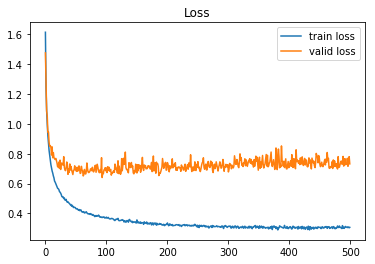

In [11]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

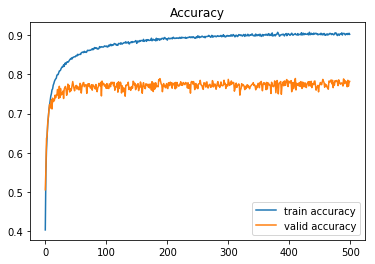

In [12]:
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()